incorporate in the NYC Subway data from https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja

(NYC Transit Subway Entrance And Exit Data)

- The data provide each subway entrance location and routes it has.

- We wish to further explore the relationship between NYC subway entrance location and home value

In [1]:
import pandas as pd
import numpy as np
import Haversine # haversine distance in km%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [47]:
Haversine.distance((40.8131105,-73.9642424),(40.8111595,-73.964498))

0.2180051585076213

In [37]:
df_subway = pd.read_csv('NYC_Transit_Subway_Entrance_And_Exit_Data.csv')

In [22]:
df_subway

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.654490, -74.004499)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
5,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NE,40.649389,-74.009333,"(40.648939, -74.010006)","(40.649389, -74.009333)"
6,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NW,40.649424,-74.009728,"(40.648939, -74.010006)","(40.649424, -74.009728)"
7,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NE,40.649265,-74.009457,"(40.648939, -74.010006)","(40.649265, -74.009457)"
8,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NW,40.649546,-74.009602,"(40.648939, -74.010006)","(40.649546, -74.009602)"
9,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,53rd St,SW,40.644653,-74.014690,"(40.645069, -74.014034)","(40.644653, -74.014690)"


In [ ]:
# calculate each home's proximity to subway entrance

In [23]:
df_visual = pd.read_csv('data for visual.csv')

In [52]:
len(df_visual.dropna())

4589

In [49]:
df_visual.

5504

In [25]:
lat_min = min(df_visual['latitude'])
lat_max = max(df_visual['latitude'])
log_min = min(df_visual['logitude'])
log_max = max(df_visual['logitude'])

In [26]:
print(lat_min)
print(lat_max)
print(log_min)
print(log_max)

40.704399
40.87243400000001
-74.018116
-73.89805799999998


In [27]:
df_subway = df_subway[(df_subway['Entrance Latitude']>= lat_min) &
                      (df_subway['Entrance Latitude']<= lat_max) &
                      (df_subway['Entrance Longitude']>= log_min) &
                      (df_subway['Entrance Longitude']<= log_max)
                     ]

In [55]:
len(df_subway['Station Name'].unique())

356

In [31]:
len(df_subway)

1011

In [62]:
df_subway.loc[0]['Entrance Latitude']

40.660322999999998

In [110]:
# Haversine distance calculation
#for h in range(len(df_visual)):
# break up into several 
for h in range(2000,len(df_visual)):
    dist_array = np.zeros(len(df_subway))
    for i in range(len(df_subway)):
        entrance_lat = df_subway.loc[i]['Entrance Latitude']
        entrance_log = df_subway.loc[i]['Entrance Longitude']
        home_lat = df_visual.loc[h]['latitude']
        home_log = df_visual.loc[h]['logitude']
        dist_array[i] = Haversine.distance((entrance_lat,entrance_log),(home_lat,home_log))
    df_visual.loc[h,'Station Name'] = df_subway.loc[np.argmin(dist_array)]['Station Name']
    df_visual.loc[h,'Route1'] = df_subway.loc[np.argmin(dist_array)]['Route1']
    df_visual.loc[h,'Route2'] = df_subway.loc[np.argmin(dist_array)]['Route2']
    df_visual.loc[h,'Route3'] = df_subway.loc[np.argmin(dist_array)]['Route3']
    df_visual.loc[h,'Route4'] = df_subway.loc[np.argmin(dist_array)]['Route4']
    df_visual.loc[h,'Route5'] = df_subway.loc[np.argmin(dist_array)]['Route5']
    df_visual.loc[h,'Route6'] = df_subway.loc[np.argmin(dist_array)]['Route6']
    df_visual.loc[h,'Route7'] = df_subway.loc[np.argmin(dist_array)]['Route7']
    df_visual.loc[h,'Route8'] = df_subway.loc[np.argmin(dist_array)]['Route8']
    df_visual.loc[h,'Route9'] = df_subway.loc[np.argmin(dist_array)]['Route9']
    df_visual.loc[h,'Route10'] = df_subway.loc[np.argmin(dist_array)]['Route10']
    df_visual.loc[h,'Route11'] = df_subway.loc[np.argmin(dist_array)]['Route11']
    df_visual.loc[h,'distance to subway'] = min(dist_array)
    # about 5 seconds for each home

In [112]:
df_visual.loc[1000:len(df_visual)]

,Neighborhood,bath,bed,latitude,logitude,price,size,year built,zipcode,Station Name,...,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,distance to subway
1000,Gramercy Park and Murray Hill,1.0,1.0,40.738560,-73.980063,495000.0,550.0,1964.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.532120
1001,Gramercy Park and Murray Hill,4.0,3.0,40.740510,-73.988104,10878000.0,2723.0,2009.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094929
1002,Gramercy Park and Murray Hill,2.0,3.0,40.739870,-73.982761,1999000.0,1750.0,1964.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275556
1003,Gramercy Park and Murray Hill,1.0,1.0,40.737900,-73.985500,1095000.0,NaN,1930.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196863
1004,Gramercy Park and Murray Hill,1.0,1.0,40.737956,-73.982748,749000.0,321079.0,1931.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363127
1005,Gramercy Park and Murray Hill,4.0,3.0,40.743475,-73.988684,11600000.0,3008.0,1912.0,10010.0,28th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180355
1006,Gramercy Park and Murray Hill,4.0,4.0,40.742698,-73.989601,16000000.0,3309.0,1915.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088496
1007,Gramercy Park and Murray Hill,1.0,1.0,40.739339,-73.981704,650000.0,650.0,1976.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374315
1008,Gramercy Park and Murray Hill,1.0,1.0,40.740797,-73.982184,629000.0,750.0,1925.0,10010.0,28th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.293011
1009,Gramercy Park and Murray Hill,2.0,3.0,40.737201,-73.980796,1499000.0,1500.0,1965.0,10010.0,23rd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547767


In [115]:
df_visual.to_csv('data_with_subway_distance.csv')

In [3]:
df = pd.read_csv('data_with_subway_distance.csv')

In [6]:
df= df.drop(columns = 'Unnamed: 0')

In [7]:
df.head()

,Neighborhood,bath,bed,latitude,logitude,price,size,year built,zipcode,Station Name,...,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,distance to subway
0,Central Harlem,1.0,3.0,40.801399,-73.954902,375000.0,NaN,1920,10026.0,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300754
1,Central Harlem,1.0,1.0,40.805369,-73.951677,279000.0,NaN,1900,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300514
2,Central Harlem,1.0,3.0,40.804500,-73.958000,350000.0,NaN,1910,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199483
3,Central Harlem,4.0,6.0,40.805301,-73.957099,1350000.0,3264.0,1901,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149062
4,Central Harlem,4.0,5.0,40.802393,-73.957916,3995000.0,3333.0,1900,10026.0,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174712


In [78]:
df_visual['Station Name'] = df_subway.loc[np.argmin(dist_array)]['Station Name']
df_visual['Route1'] = df_subway.loc[np.argmin(dist_array)]['Route1']
df_visual['Route2'] = df_subway.loc[np.argmin(dist_array)]['Route2']
df_visual['Route3'] = df_subway.loc[np.argmin(dist_array)]['Route3']
df_visual['Route4'] = df_subway.loc[np.argmin(dist_array)]['Route4']
df_visual['Route5'] = df_subway.loc[np.argmin(dist_array)]['Route5']
df_visual['Route6'] = df_subway.loc[np.argmin(dist_array)]['Route6']
df_visual['Route7'] = df_subway.loc[np.argmin(dist_array)]['Route7']
df_visual['Route8'] = df_subway.loc[np.argmin(dist_array)]['Route8']
df_visual['Route9'] = df_subway.loc[np.argmin(dist_array)]['Route9']
df_visual['Route10'] = df_subway.loc[np.argmin(dist_array)]['Route10']
df_visual['Route11'] = df_subway.loc[np.argmin(dist_array)]['Route11']
df_visual['distance to subway'] = min(dist_array)

In [84]:
df_visual.loc[0,'distance to subway'] = min(dist_array)

In [85]:
df_visual.loc[0,'Station Name'] = df_subway.loc[np.argmin(dist_array)]['Station Name']
df_visual.loc[0,'Route1'] = df_subway.loc[np.argmin(dist_array)]['Route1']
df_visual.loc[0,'Route2'] = df_subway.loc[np.argmin(dist_array)]['Route2']
df_visual.loc[0,'Route3'] = df_subway.loc[np.argmin(dist_array)]['Route3']
df_visual.loc[0,'Route4'] = df_subway.loc[np.argmin(dist_array)]['Route4']
df_visual.loc[0,'Route5'] = df_subway.loc[np.argmin(dist_array)]['Route5']
df_visual.loc[0,'Route6'] = df_subway.loc[np.argmin(dist_array)]['Route6']
df_visual.loc[0,'Route7'] = df_subway.loc[np.argmin(dist_array)]['Route7']
df_visual.loc[0,'Route8'] = df_subway.loc[np.argmin(dist_array)]['Route8']
df_visual.loc[0,'Route9'] = df_subway.loc[np.argmin(dist_array)]['Route9']
df_visual.loc[0,'Route10'] = df_subway.loc[np.argmin(dist_array)]['Route10']
df_visual.loc[0,'Route11'] = df_subway.loc[np.argmin(dist_array)]['Route11']
df_visual.loc[0,'distance to subway'] = min(dist_array)


In [74]:
df_visual.loc[0]

Neighborhood    Central Harlem
bath                         1
bed                          3
latitude               40.8014
logitude              -73.9549
price                   375000
size                       NaN
year built                1920
zipcode                  10026
Name: 0, dtype: object

In [172]:
df.head()

,Neighborhood,bath,bed,latitude,logitude,price,size,year built,zipcode,Station Name,...,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,distance to subway,number of subway lines
0,Central Harlem,1.0,3.0,40.801399,-73.954902,375000.0,NaN,1920,10026.0,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300754,2
1,Central Harlem,1.0,1.0,40.805369,-73.951677,279000.0,NaN,1900,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300514,2
2,Central Harlem,1.0,3.0,40.804500,-73.958000,350000.0,NaN,1910,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199483,2
3,Central Harlem,4.0,6.0,40.805301,-73.957099,1350000.0,3264.0,1901,10026.0,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149062,2
4,Central Harlem,4.0,5.0,40.802393,-73.957916,3995000.0,3333.0,1900,10026.0,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174712,2


In [8]:
df['year built'].unique()

array(['1920', '1900', '1910', '1901', '1925', '1999', '1903', '1904',
       '2008', '1899', nan, '2016', '2006', '2003', '1915', '1989', '2017',
       '2007', '1988', '2019', '1892', '2012', '2015', '2014', '1912',
       '1987', '1905', 'No', '1940', '1909', '2018', '2005', '1926',
       '2000', '1956', '2010', '1957', '2011', '1921', '1950', '1994',
       '1980', '1930', '1893', '1880', '2002', '1871', '1895', '1927',
       '1907', '1914', '1963', '1918', '1913', '1911', '2009', '1929',
       '1906', '1924', '1922', '1839', '1902', '2013', '1861', '1928',
       '1931', '1938', '1800', '1923', '1886', '2001', '1973', '1959',
       '1964', '1939', '1955', '1983', '1932', '1961', '1952', '1917',
       '1960', '1962', '2004', '1936', '1885', '1937', '1986', '1948',
       '1941', '1969', '1978', '1968', '1908', '1982', '1979', '1945',
       '1933', '1998', '1888', '2007.0', '2008.0', '1888.0', '1988.0',
       '2017.0', '2009.0', '2005.0', '2003.0', '1930.0', '2018.0',
       

In [18]:
df_c = df.dropna(subset = ['year built'])
df_c = (df_c[(df_c['year built'] != 'Shared') & (df_c['year built'] != 'Hardwood')& (df_c['year built'] != 'No')])


In [19]:
#a =  a[a['year built'] != 'Shared']
df_c['year built']=df_c['year built'].apply(float).apply(int)

In [20]:
len(df_c)

5326

In [21]:
df_c[ ['bath', 'bed','logitude','latitude','year built','price','size','distance to subway']].corr()['price']

bath                  0.660530
bed                   0.481550
logitude             -0.128406
latitude             -0.056292
year built           -0.008212
price                 1.000000
size                 -0.056603
distance to subway   -0.064534
Name: price, dtype: float64

(array([   6.,  218.,  444.,  646.,  497.,  295.,  283.,  259.,  211.,
         223.,  124.,  160.,  163.,  130.,  142.,  383.,  195.,  149.,
         131.,   98.,   93.,   68.,   93.,   90.,   42.,   71.,   40.,
          28.,   19.,   25.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 30 Patch objects>)

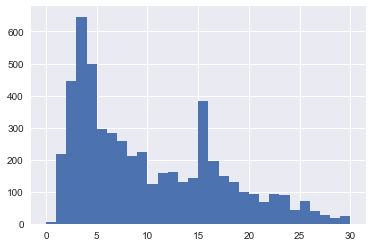

In [22]:
plt.hist(df_c['price_range'],bins = 30)

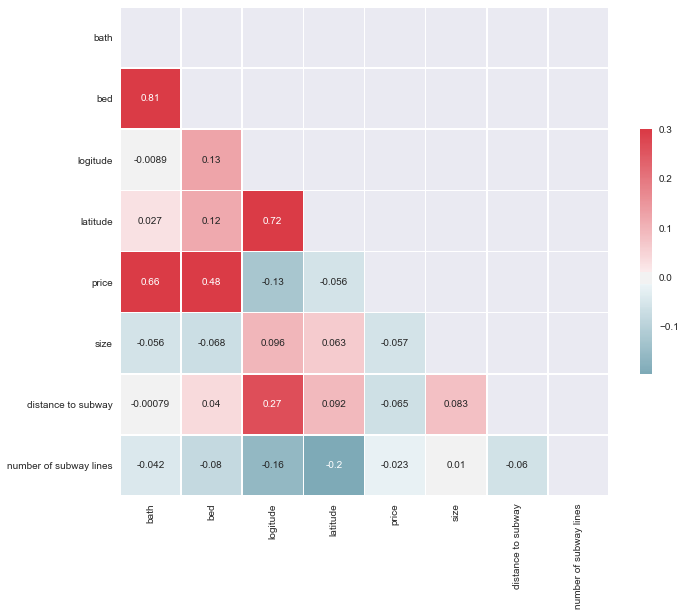

In [509]:
# Compute the correlation matrix
corr = df_c[ ['bath', 'bed','logitude','latitude','price','size','distance to subway','number of subway lines']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .5})

sns_plot.figure.savefig("/Users/sarahyu/Documents/GitHub/Zillow-Home-Value-Prediction/plots/df_correlation.png")


In [147]:
df =  pd.read_csv('data_with_subway_distance.csv')

In [151]:
df = df.drop(columns = 'Unnamed: 0')

In [153]:
for i in range(0,len(df)):
    df.loc[i,'number of subway lines'] = len(df.loc[i,'Route1':'Route11'].dropna())

In [154]:
 df['number of subway lines'] = df['number of subway lines'].apply(int)

In [158]:
max(df['number of subway lines'])

11

In [23]:
df['zipcode']=df['zipcode'].apply(int).apply(str)

In [24]:
df.loc[df['Neighborhood'] == 'Garment-District','Neighborhood'] ='Chelsea and Clinton'
df.loc[df['Neighborhood'] == 'murray-hill','Neighborhood'] ='Gramercy Park and Murray Hill'

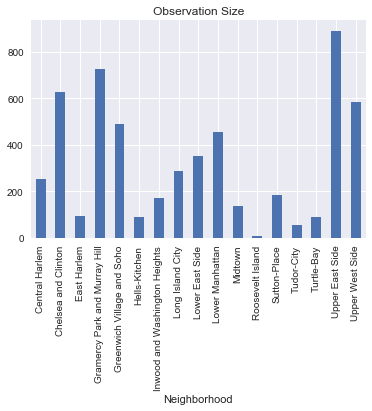

In [25]:
groupby = df.groupby('Neighborhood')

groupby[ ['price','distance to subway']].corr().to_csv('correlation.csv')
groupby[['price','distance to subway']].size().plot(kind='bar',title='Observation Size')

In [26]:
groupby[['price','distance to subway']].corr()['price'][1::2]

Neighborhood                                     
Central Harlem                 distance to subway   -0.153857
Chelsea and Clinton            distance to subway   -0.011453
East Harlem                    distance to subway    0.058784
Gramercy Park and Murray Hill  distance to subway   -0.149469
Greenwich Village and Soho     distance to subway    0.034299
Hells-Kitchen                  distance to subway    0.397001
Inwood and Washington Heights  distance to subway    0.058643
Long Island City               distance to subway    0.101223
Lower East Side                distance to subway   -0.156875
Lower Manhattan                distance to subway   -0.060101
Midtown                        distance to subway    0.015166
Roosevelt Island               distance to subway   -0.188285
Sutton-Place                   distance to subway   -0.314739
Tudor-City                     distance to subway   -0.027366
Turtle-Bay                     distance to subway    0.036733
Upper East Side     

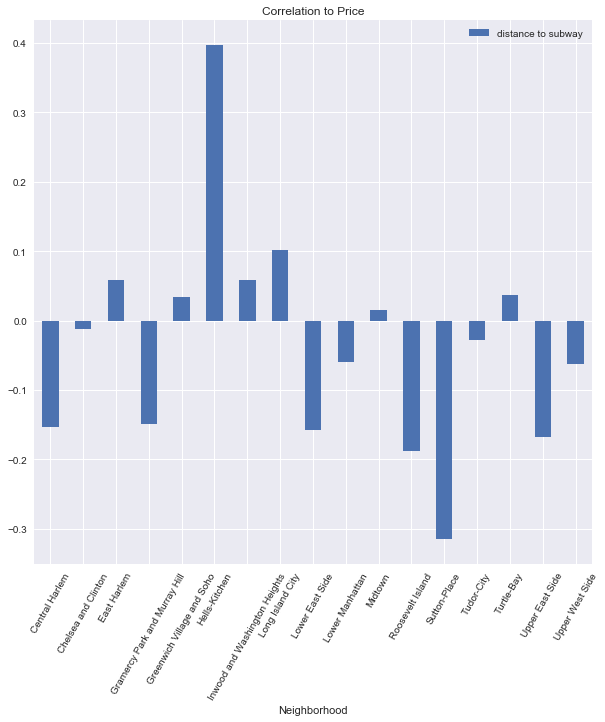

In [289]:
groupby[['price','distance to subway']].corr()['price'][1::2].unstack().plot(kind='bar',title='Correlation to Price',figsize=(10, 10))
plt.xticks(rotation=60)
plt.savefig('/Users/sarahyu/Documents/GitHub/Zillow-Home-Value-Prediction/plots/subway_distance_corrlation_grouby.png')
plt.show()


In [186]:
groupby_zipcode = df.groupby('zipcode')
groupby_zipcode[['price','distance to subway']].corr().to_csv('correlation_zipcode.csv')

In [296]:
groupby_zipcode_neiborhood = df.groupby(['zipcode','Neighborhood'])
groupby_zipcode_neiborhood[['price','distance to subway']].corr().dropna()['price'][1::2].sort_values()


zipcode  Neighborhood                                     
10017    Tudor-City                     distance to subway   -7.668925e-01
10282    Lower Manhattan                distance to subway   -6.151455e-01
10022    Chelsea and Clinton            distance to subway   -6.090672e-01
10023    Chelsea and Clinton            distance to subway   -3.838471e-01
10002    Lower East Side                distance to subway   -3.271900e-01
10026    Central Harlem                 distance to subway   -3.184824e-01
10022    Sutton-Place                   distance to subway   -3.165487e-01
10039    Central Harlem                 distance to subway   -3.072476e-01
10009    Lower East Side                distance to subway   -2.941521e-01
10010    Gramercy Park and Murray Hill  distance to subway   -2.583152e-01
10075    Upper East Side                distance to subway   -2.356882e-01
10024    Upper West Side                distance to subway   -2.195723e-01
10021    Upper East Side                d

In [280]:
groupby_zipcode_neiborhood[['price','distance to subway']].size()

zipcode  Neighborhood                 
10001    Chelsea and Clinton               96
         Hells-Kitchen                     12
10002    Lower East Side                  144
10003    Lower East Side                  165
10004    Lower Manhattan                   47
10005    Lower Manhattan                   64
10006    Lower Manhattan                   52
10007    Lower Manhattan                  103
10009    Lower East Side                   45
10010    Gramercy Park and Murray Hill    170
10011    Chelsea and Clinton              176
10012    Greenwich Village and Soho       122
10013    Greenwich Village and Soho       188
10014    Greenwich Village and Soho       181
10016    Gramercy Park and Murray Hill    226
         Tudor-City                        53
10017    Chelsea and Clinton                1
         Gramercy Park and Murray Hill    175
         Tudor-City                         3
         Turtle-Bay                        13
10018    Chelsea and Clinton             

In [472]:
groupby_zipcode_neiborhood[['price','distance to subway']].corr().dropna()['price'][1::2].sort_values()

zipcode  Neighborhood                                     
10017    Tudor-City                     distance to subway   -7.668925e-01
10282    Lower Manhattan                distance to subway   -6.151455e-01
10022    Chelsea and Clinton            distance to subway   -6.090672e-01
10023    Chelsea and Clinton            distance to subway   -3.838471e-01
10002    Lower East Side                distance to subway   -3.271900e-01
10026    Central Harlem                 distance to subway   -3.184824e-01
10022    Sutton-Place                   distance to subway   -3.165487e-01
10039    Central Harlem                 distance to subway   -3.072476e-01
10009    Lower East Side                distance to subway   -2.941521e-01
10010    Gramercy Park and Murray Hill  distance to subway   -2.583152e-01
10075    Upper East Side                distance to subway   -2.356882e-01
10024    Upper West Side                distance to subway   -2.195723e-01
10021    Upper East Side                d

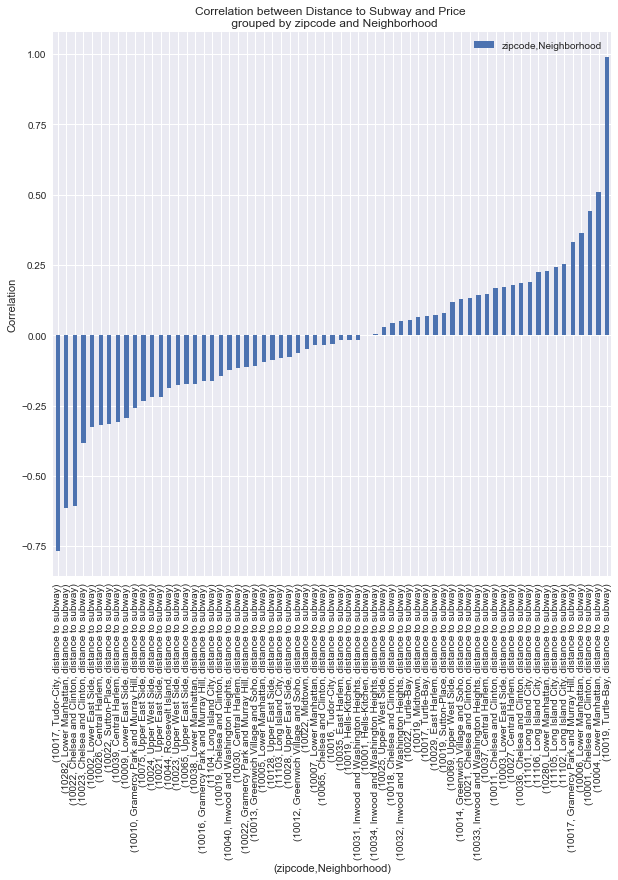

In [304]:
groupby_zipcode_neiborhood[['price','distance to subway']].corr().dropna()['price'][1::2].sort_values().plot(kind='bar',
                                                                                                             title='Correlation between Distance to Subway and Price \n grouped by zipcode and Neighborhood',
                                                                                                             figsize=(10, 10),
                                                                                                             label = 'zipcode,Neighborhood')
plt.xlabel('(zipcode,Neighborhood)')
plt.ylabel('Correlation')
plt.legend()
plt.show()


In [27]:
df['price'].describe()

count    5.504000e+03
mean     3.659049e+06
std      6.174104e+06
min      2.995000e+03
25%      8.250000e+05
50%      1.650000e+06
75%      3.595000e+06
max      8.800000e+07
Name: price, dtype: float64

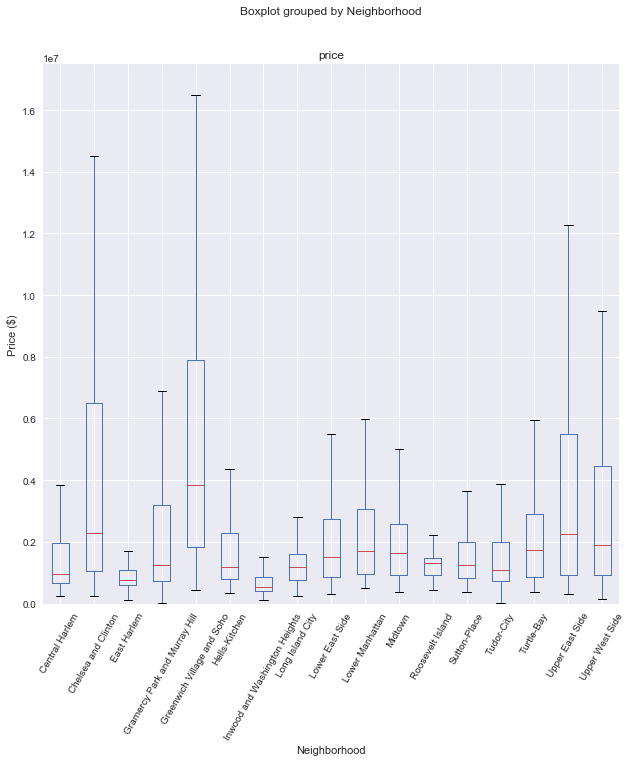

In [332]:
#visualization of sale price range grouby zipcode
fig, ax = plt.subplots(figsize=(10, 10))
df.boxplot(column = 'price',by='Neighborhood', ax= ax)
ax.set_ylim([-10000,17500000])
plt.ylabel('Price ($)')
plt.xticks(rotation=60)
#plt.savefig('grouby1.png')
plt.show()


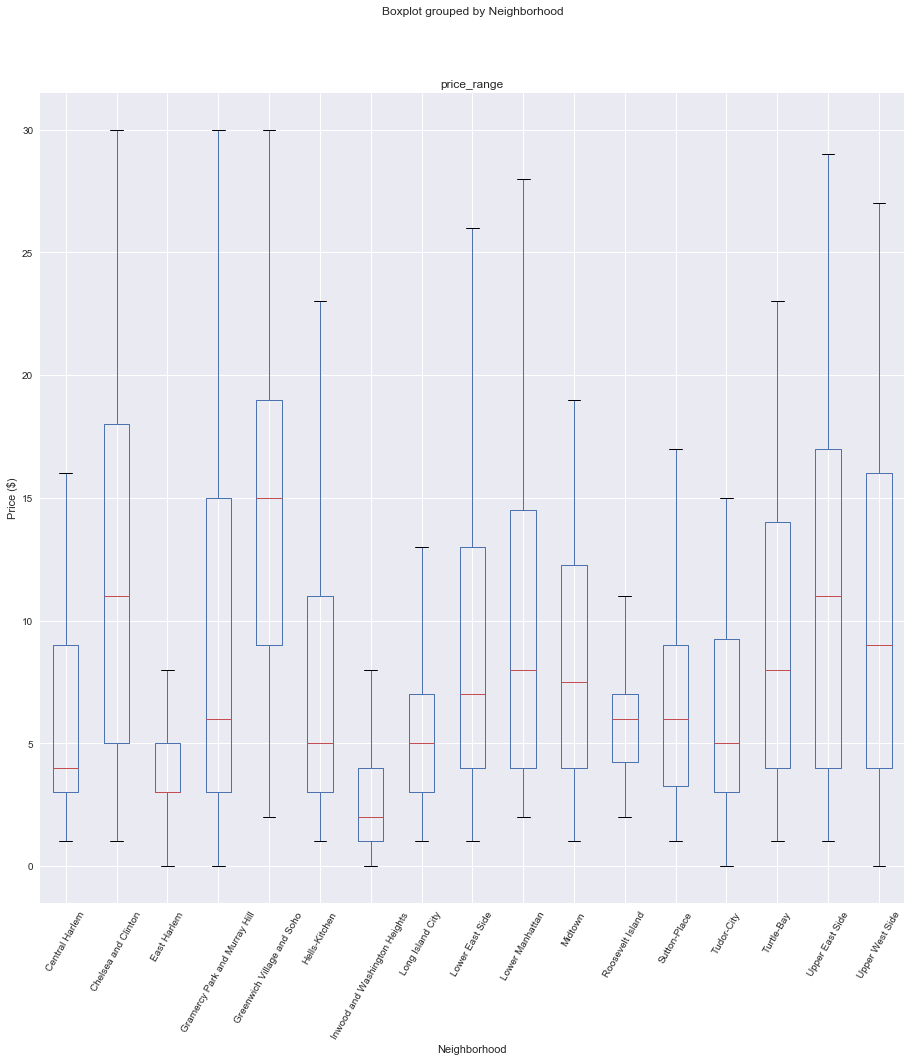

In [339]:
#visualization of sale price range grouby zipcode
fig, ax = plt.subplots(figsize=(15, 15))
df.boxplot(column = 'price_range',by='Neighborhood', ax= ax)
#ax.set_ylim([-10000,17500000])
plt.ylabel('Price ($)')
plt.xticks(rotation=60)
plt.savefig('/Users/sarahyu/Documents/GitHub/Zillow-Home-Value-Prediction/plots/price_range_grouby.png')
plt.show()


In [14]:
def fix_price(price):
        try:
            price = int(float(price))
        except:
            return np.NaN
        
        if price < 200000:
            return 0
        elif price>= 200000 and price<= 400000:
            return 1
        elif price>= 400000 and price<= 600000:
            return 2
        elif price>= 600000 and price<= 800000:
            return 3
        elif price>= 800000 and price<= 1000000:
            return 4
        elif price>= 1000000 and price<= 1200000:
            return 5
        elif price>= 1200000 and price<= 1400000:
            return 6
        elif price>= 1400000 and price<= 1600000:
            return 7
        elif price>= 1600000 and price<= 1800000:
            return 8
        elif price>= 1800000 and price<= 2000000:
            return 9
        elif price>= 2000000 and price<= 2200000:
            return 10
        elif price>= 2200000 and price<= 2400000:
            return 11
        elif price>= 2400000 and price<= 2600000:
            return 12
        elif price>= 2600000 and price<= 2800000:
            return 13
        elif price>= 2800000 and price<= 3000000:
            return 14
        elif price>= 3000000 and price<= 4000000:
            return 15
        elif price>= 4000000 and price<= 5000000:
            return 16
        elif price>= 5000000 and price<= 6000000:
            return 17
        elif price>= 6000000 and price<= 7000000:
            return 18
        elif price>= 7000000 and price<= 8000000:
            return 19
        elif price>= 8000000 and price<= 9000000:
            return 20
        elif price>= 9000000 and price<= 10000000:
            return 21
        elif price>= 10000000 and price<= 12000000:
            return 22
        elif price>= 12000000 and price<= 15000000:
            return 23
        elif price>= 15000000 and price<= 17000000:
            return 24
        elif price>= 17000000 and price<= 20000000:
            return 25
        elif price>= 20000000 and price<= 25000000:
            return 26
        elif price>= 25000000 and price<= 30000000:
            return 27
        elif price>= 30000000 and price<= 40000000:
            return 28
        elif price>= 40000000 and price<= 60000000:
            return 29
        else:
            return 30

In [15]:
df['price'] = df['price'].astype(int)

In [16]:
df['price_range'] = df['price'].apply(fix_price)

In [29]:
df_c = df[['Neighborhood', 'bath', 'bed', 'latitude', 'logitude', 'size', 'zipcode', 'distance to subway', 'number of subway lines',
       'price_range']].dropna()

KeyError: "['number of subway lines'] not in index"

In [354]:
len(df)

5504

In [405]:
df_2['Neighborhood']=='Upper East Side'

3       False
4       False
5       False
7       False
8       False
12      False
14      False
15      False
16      False
18      False
19      False
20      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
        ...  
5460    False
5461    False
5462    False
5464    False
5465    False
5467    False
5468    False
5469    False
5472    False
5473    False
5475    False
5478    False
5479    False
5480    False
5481    False
5482    False
5483    False
5485    False
5486    False
5489    False
5492    False
5493    False
5494    False
5495    False
5496    False
5497    False
5498    False
5499    False
5501    False
5503    False
Name: Neighborhood, Length: 4729, dtype: bool

In [464]:
y = df_2[df_2['zipcode']=='10026'].price_range
X = df_2[df_2['zipcode']=='10026'][['latitude','logitude','bath','bed','size','distance to subway']]
#X = df_2[['logitude','latitude']]

In [458]:
y = df_2.price_range
X = df_2[['latitude','logitude','bath','bed','size','distance to subway']]

In [38]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors


In [465]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 4)
normalized_X = preprocessing.normalize(X)

In [466]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57, 6)
(57,)
(15, 6)
(15,)


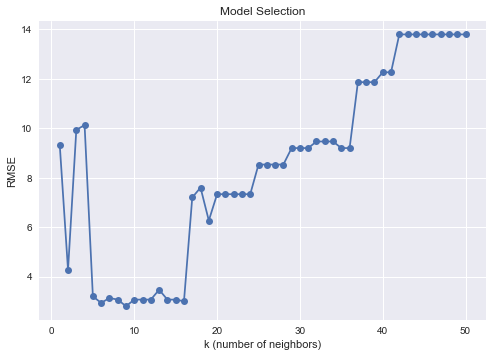

In [467]:
mse = np.zeros(50)
accuracy = np.zeros(50)
for i in range(1,51):
    knn = neighbors.KNeighborsClassifier(i, weights='uniform')
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse[i-1] = mean_squared_error(y_test, y_pred)
    accuracy[i-1] = knn.score(X_test,y_test)
plt.plot(range(1,51),mse,'-o')
plt.xlabel('k (number of neighbors)')
plt.ylabel('RMSE')
plt.title('Model Selection')
plt.show()

In [468]:
np.argmin(mse) # n = 9 gives the best number of neighbors

8

In [469]:
n_neighbors = np.argmin(mse)+1
#for i, weights in enumerate(['uniform', 'distance']):
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
y_pred = knn.fit(X_train, y_train).predict(X_test)

# Create Dataset with Testing values and Predicted Prices
print("KNN Regresson Model")
model_knn = pd.DataFrame(X_test)
model_knn['MEDV'] = y_test
model_knn['Predicted MEDV'] = y_pred
print(model_knn.head(10))

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("KNN Regresson Model Performance:-- ", err)

# Create Regression Plot for Test and Prediction values
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(y_test, y_pred, marker = 'o', color = 'blue')
ax.set_title('KNN Regression', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))
plt.savefig( "KNNRegression.png", dpi=70)
plt.close(fig)

KNN Regresson Model
     latitude   logitude  bath  bed    size  distance to subway  MEDV  \
40  40.799803 -73.952953   2.0  3.0  1037.0            0.114045     4   
80  40.798500 -73.951698   1.0  1.0   664.0            0.066565     4   
77  40.800461 -73.952853   1.0  1.0   910.0            0.172311     4   
30  40.804415 -73.948764   2.0  3.0  1457.0            0.256417     6   
37  40.803199 -73.945999   1.0  0.0   100.0            0.313650     3   
8   40.802101 -73.948799   1.0  1.0   700.0            0.053713     1   
29  40.800473 -73.956416   1.0  2.0   670.0            0.173030     3   
46  40.802331 -73.951915   1.0  2.0   740.0            0.171445     3   
64  40.798500 -73.951698   1.0  0.0   450.0            0.066565     3   
62  40.801077 -73.947794   1.0  0.0   500.0            0.176903     2   

    Predicted MEDV  
40               4  
80               3  
77               4  
30               6  
37               3  
8                3  
29               3  
46      

In [423]:
df.head()

,Neighborhood,bath,bed,latitude,logitude,price,size,year built,zipcode,Station Name,...,Route5,Route6,Route7,Route8,Route9,Route10,Route11,distance to subway,number of subway lines,price_range
0,Central Harlem,1.0,3.0,40.801399,-73.954902,375000,NaN,1920,10026,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300754,2,1
1,Central Harlem,1.0,1.0,40.805369,-73.951677,279000,NaN,1900,10026,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300514,2,1
2,Central Harlem,1.0,3.0,40.804500,-73.958000,350000,NaN,1910,10026,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199483,2,1
3,Central Harlem,4.0,6.0,40.805301,-73.957099,1350000,3264.0,1901,10026,116th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149062,2,6
4,Central Harlem,4.0,5.0,40.802393,-73.957916,3995000,3333.0,1900,10026,Cathedral Parkway-110th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174712,2,15


In [454]:
df_ml = pd.read_csv('dataforml2.csv')

In [456]:
df_ml.head()

,bath,bed,latitude,logitude,price,size,year built,zipcode,distance to subway,complaints
0,4,6,40.805301,-73.957099,1350000,3264,1901,10026,0.149062,5057.0
1,4,5,40.802393,-73.957916,3995000,3333,1900,10026,0.174712,5057.0
2,3,15,40.799701,-73.953697,4000000,3200,1900,10026,0.156687,5057.0
3,2,2,40.805792,-73.956890,975000,923,1901,10026,0.170256,5057.0
4,1,1,40.802101,-73.948799,385000,700,1999,10026,0.053713,5057.0


In [457]:
zipcode_dict = dict() #dictionary of Zip Codes by Neighborhood in Manhattan
# Reference: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
zipcode_dict['Chelsea and Clinton'] = ['10001', '10011', '10018', '10019', '10020', '10036']
zipcode_dict['Central Harlem'] = ['10026', '10027', '10030', '10037', '10039']
zipcode_dict['East Harlem'] = ['10029', '10035']
zipcode_dict['Gramercy Park and Murray Hill'] = ['10010', '10016', '10017', '10022']
zipcode_dict['Greenwich Village and Soho'] = ['10012', '10013', '10014']
zipcode_dict['Lower Manhattan'] =['10004', '10005', '10006', '10007', '10038', '10280','10282']
zipcode_dict['Lower East Side'] =['10002', '10003', '10009']
zipcode_dict['Upper East Side'] =['10021', '10028', '10044', '10065', '10075', '10128']
zipcode_dict['Upper West Side'] =['10023', '10024', '10025']
zipcode_dict['Inwood and Washington Heights'] =['10031', '10032', '10033', '10034', '10040']
zipcode_dict['Roosevelt Island'] =['10044']
# Long Island City
zipcode_dict['Long Island City'] =['11101', '11102', '11103', '11104', '11105', '11106', '11109']

In [471]:
len(df)

5504

In [474]:
df['price'].describe()

count    5.504000e+03
mean     3.659049e+06
std      6.174104e+06
min      2.995000e+03
25%      8.250000e+05
50%      1.650000e+06
75%      3.595000e+06
max      8.800000e+07
Name: price, dtype: float64

In [31]:
df_ml = pd.read_csv('mldata_binary.csv')

In [32]:
df_ml.head()

,bath,bed,latitude,logitude,price,size,year built,distance to subway,complaints,10001,...,10030,10031,10032,10034,10036,10037,10038,10039,10044,10065
0,4,6,40.805301,-73.957099,1350000,3264,1901,0.149062,5057,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,40.802393,-73.957916,3995000,3333,1900,0.174712,5057,0,...,0,0,0,0,0,0,0,0,0,0
2,3,15,40.799701,-73.953697,4000000,3200,1900,0.156687,5057,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,40.805792,-73.956890,975000,923,1901,0.170256,5057,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,40.802101,-73.948799,385000,700,1999,0.053713,5057,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_ml.columns

Index(['bath', 'bed', 'latitude', 'logitude', 'price', 'size', 'year built',
       'distance to subway', 'complaints', '10001', '10002', '10003', '10007',
       '10009', '10011', '10012', '10013', '10014', '10016', '10017', '10018',
       '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028',
       '10030', '10031', '10032', '10034', '10036', '10037', '10038', '10039',
       '10044', '10065'],
      dtype='object')

In [82]:
df_ml[df_ml['10065']==1]

,bath,bed,latitude,logitude,price,size,year built,distance to subway,complaints,10001,...,10031,10032,10034,10036,10037,10038,10039,10044,10065,price_range
626,11,7,40.766201,-73.970397,67000000,13000,1910,0.211896,1606,0,...,0,0,0,0,0,0,0,0,1,30
628,2,2,40.765154,-73.967956,725000,202841,1927,0.125099,1606,0,...,0,0,0,0,0,0,0,0,1,3
631,4,4,40.762664,-73.964743,11950000,4833,1871,0.108910,1606,0,...,0,0,0,0,0,0,0,0,1,22
636,4,4,40.762874,-73.964476,9950000,4138,1871,0.139596,1606,0,...,0,0,0,0,0,0,0,0,1,21
639,1,1,40.763155,-73.962240,350000,550,1959,0.325530,1606,0,...,0,0,0,0,0,0,0,0,1,1
643,8,5,40.767722,-73.968977,35000000,9440,1940,0.377638,1606,0,...,0,0,0,0,0,0,0,0,1,28
647,4,4,40.764253,-73.960657,2950000,143590,1957,0.474802,1606,0,...,0,0,0,0,0,0,0,0,1,14
648,10,5,40.766178,-73.966491,19995000,8000,1910,0.143899,1606,0,...,0,0,0,0,0,0,0,0,1,25
1981,8,7,40.767501,-73.970199,59000000,12000,1931,0.324925,1606,0,...,0,0,0,0,0,0,0,0,1,29
1982,2,2,40.766137,-73.970276,1100000,1042,1920,0.216822,1606,0,...,0,0,0,0,0,0,0,0,1,5


In [113]:
df_knn = df_ml [['bath', 'bed', 'latitude', 'logitude', 'price', 'size', 'year built',
       'distance to subway', 'complaints','price_range']]

In [114]:
df_ml['price_range'] = df_ml['price'].apply(fix_price)

In [136]:
X = df_knn[['latitude','logitude','bath','bed','distance to subway','complaints']]

In [137]:
y = df_knn['price']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 4)
normalized_X = preprocessing.normalize(X)

In [139]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2775, 6)
(2775,)
(694, 6)
(694,)


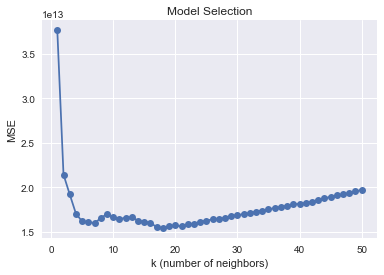

In [140]:
mse = np.zeros(50)
accuracy = np.zeros(50)
for i in range(1,51):
    knn = neighbors.KNeighborsRegressor(i, weights='uniform')
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse[i-1] = mean_squared_error(y_test, y_pred)
    accuracy[i-1] = knn.score(X_test,y_test)
plt.plot(range(1,51),mse,'-o')
plt.xlabel('k (number of neighbors)')
plt.ylabel('MSE')
plt.title('Model Selection')
plt.show()

In [141]:
np.argmin(mse)

17

In [143]:
n_neighbors = np.argmin(mse)+1
#for i, weights in enumerate(['uniform', 'distance']):
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
y_pred = knn.fit(X_train, y_train).predict(X_test)

# Create Dataset with Testing values and Predicted Prices
print("KNN Regresson Model")
model_knn = pd.DataFrame(X_test)
model_knn['MEDV'] = y_test
model_knn['Predicted MEDV'] = y_pred
print(model_knn.head(10))

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("KNN Regresson Model Performance:-- ", err)

# Create Regression Plot for Test and Prediction values
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(y_test, y_pred, marker = 'o', color = 'blue')
ax.set_title('KNN Regressor', fontsize=20)
ax.set_xlabel('Actual Price', fontsize=20)
ax.set_ylabel('Predicted Price', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))
plt.savefig( "KNN Regressor.png", dpi=70)
plt.close(fig)

KNN Regresson Model
       latitude   logitude  bath  bed  distance to subway  complaints  \
295   40.747685 -73.991170     2    1            0.172429        5441   
331   40.744499 -74.005401     3    3            0.477657        5022   
2220  40.784758 -73.976684     4    4            0.265053         150   
889   40.741766 -73.983296     4    4            0.157424        1409   
1180  40.757099 -73.963096     2    2            0.511974        1056   
3045  40.758499 -73.972198     2    1            0.112623        1056   
2146  40.783311 -73.973246     1    0            0.172831         150   
2495  40.713900 -73.977400     1    1            0.964902        6110   
1195  40.724098 -74.004116     4    4            0.167397        3804   
1937  40.778499 -73.956001     2    3            0.099130        2692   

         MEDV  Predicted MEDV  
295   2249000    2.321000e+06  
331   2199000    6.211667e+06  
2220  5950000    5.679167e+06  
889   6200000    7.123556e+06  
1180  1550000   

In [162]:
X = df_knn[['latitude','logitude','bath','bed','distance to subway','complaints']]
y = df_knn['price_range']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 4)
normalized_X = preprocessing.normalize(X)

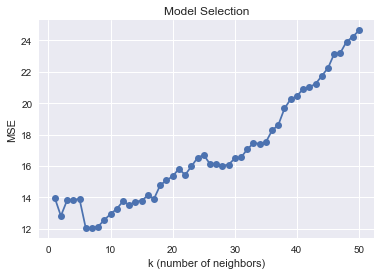

In [171]:
mse = np.zeros(50)
accuracy = np.zeros(50)
for i in range(1,51):
    knn = neighbors.KNeighborsClassifier(i, weights='uniform')
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse[i-1] = mean_squared_error(y_test, y_pred)
    accuracy[i-1] = knn.score(X_test,y_test)
plt.plot(range(1,51),mse,'-o')
plt.xlabel('k (number of neighbors)')
plt.ylabel('MSE')
plt.title('Model Selection')
plt.show()

KNN Classifier Model
       latitude   logitude  bath  bed  distance to subway  complaints  MEDV  \
295   40.747685 -73.991170     2    1            0.172429        5441    11   
331   40.744499 -74.005401     3    3            0.477657        5022    10   
2220  40.784758 -73.976684     4    4            0.265053         150    17   
889   40.741766 -73.983296     4    4            0.157424        1409    18   
1180  40.757099 -73.963096     2    2            0.511974        1056     7   
3045  40.758499 -73.972198     2    1            0.112623        1056    15   
2146  40.783311 -73.973246     1    0            0.172831         150     2   
2495  40.713900 -73.977400     1    1            0.964902        6110     3   
1195  40.724098 -74.004116     4    4            0.167397        3804    18   
1937  40.778499 -73.956001     2    3            0.099130        2692     9   

      Predicted MEDV  
295               12  
331               11  
2220              13  
889              

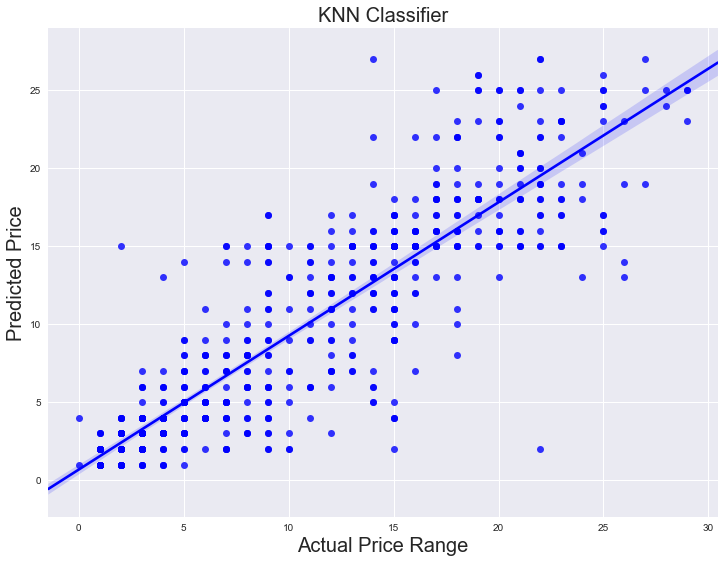

In [172]:
n_neighbors = np.argmin(mse)+1
#for i, weights in enumerate(['uniform', 'distance']):
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
y_pred = knn.fit(X_train, y_train).predict(X_test)

# Create Dataset with Testing values and Predicted Prices
print("KNN Classifier Model")
model_knn = pd.DataFrame(X_test)
model_knn['MEDV'] = y_test
model_knn['Predicted MEDV'] = y_pred
print(model_knn.head(10))

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("KNN Classifier Model Performance:-- ", err)

# Create Regression Plot for Test and Prediction values
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(y_test, y_pred, marker = 'o', color = 'blue')
ax.set_xlabel('Actual Price Range', fontsize=20)
ax.set_ylabel('Predicted Price', fontsize=20)

ax.set_title('KNN Classifier', fontsize=20)

# Save the KNN Regrassion Plot along with Error value
#plt.text(10.0, 20.0, err, fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))
plt.savefig( "KNN Classifier.png", dpi=70)
plt.show()

In [157]:
str(round(mse, 2))

'12.06'

In [105]:
df_knn_region = df_ml[df_ml['10065']==1] [['bath', 'bed', 'latitude', 'logitude', 'price', 'size', 'year built',
       'distance to subway', 'complaints','price_range']] 

In [106]:
X = df_knn_region[['latitude','logitude','bath','bed','distance to subway','complaints']]
y = df_knn_region['price_range']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 4)
normalized_X = preprocessing.normalize(X)

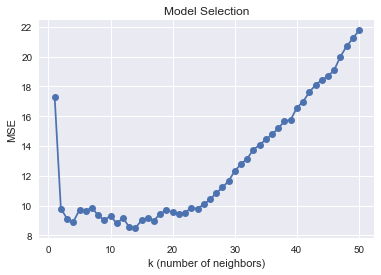

In [108]:
mse = np.zeros(50)
accuracy = np.zeros(50)
for i in range(1,51):
    knn = neighbors.KNeighborsRegressor(i, weights='uniform')
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse[i-1] = mean_squared_error(y_test, y_pred)
    accuracy[i-1] = knn.score(X_test,y_test)
plt.plot(range(1,51),mse,'-o')
plt.xlabel('k (number of neighbors)')
plt.ylabel('MSE')
plt.title('Model Selection')
plt.show()

In [109]:
np.argmin(mse)+1

14

In [103]:
n_neighbors = np.argmin(mse)+1
#for i, weights in enumerate(['uniform', 'distance']):
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
y_pred = knn.fit(X_train, y_train).predict(X_test)

# Create Dataset with Testing values and Predicted Prices
print("KNN Regresson Model")
model_knn = pd.DataFrame(X_test)
model_knn['MEDV'] = y_test
model_knn['Predicted MEDV'] = y_pred
print(model_knn.head(10))

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("KNN Regresson Model Performance:-- ", err)

# Create Regression Plot for Test and Prediction values
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(y_test, y_pred, marker = 'o', color = 'blue')
ax.set_title('KNN Classifier', fontsize=20)
ax.set_xlabel('Actual Price Range', fontsize=20)
ax.set_ylabel('Predicted Price Range', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))
plt.savefig( "KNNClassifier_regional.png", dpi=70)
plt.close(fig)

KNN Regresson Model
       latitude   logitude  bath  bed  distance to subway  complaints  MEDV  \
2101  40.770161 -73.968209     3    3            0.416259        1606    16   
643   40.767722 -73.968977     8    5            0.377638        1606    28   
2059  40.766290 -73.966758     2    2            0.157685        1606    12   
2002  40.767501 -73.967697    10    6            0.283631        1606    26   
2008  40.761621 -73.957998     1    1            0.476556        1606     2   
1984  40.764069 -73.964407     2    2            0.191409        1606     4   
2080  40.764400 -73.968200     5    5            0.143309        1606    21   
2086  40.764283 -73.958128     3    2            0.622435        1606    13   
2056  40.767048 -73.967380     2    1            0.251436        1606     3   
1999  40.765154 -73.967956     2    2            0.125099        1606     3   

      Predicted MEDV  
2101              17  
643               25  
2059               7  
2002              

In [97]:
np.sqrt(8)

2.8284271247461903